<a href="https://colab.research.google.com/github/SharonEstivalez/FisicaComputacional1/blob/master/Evaluaci%C3%B3n%203/Evaluacion3_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***$$Evaluación  \space 3$$***



Pacheco Rodriguez Sharon Estivalez

**Problema 1:** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.



True


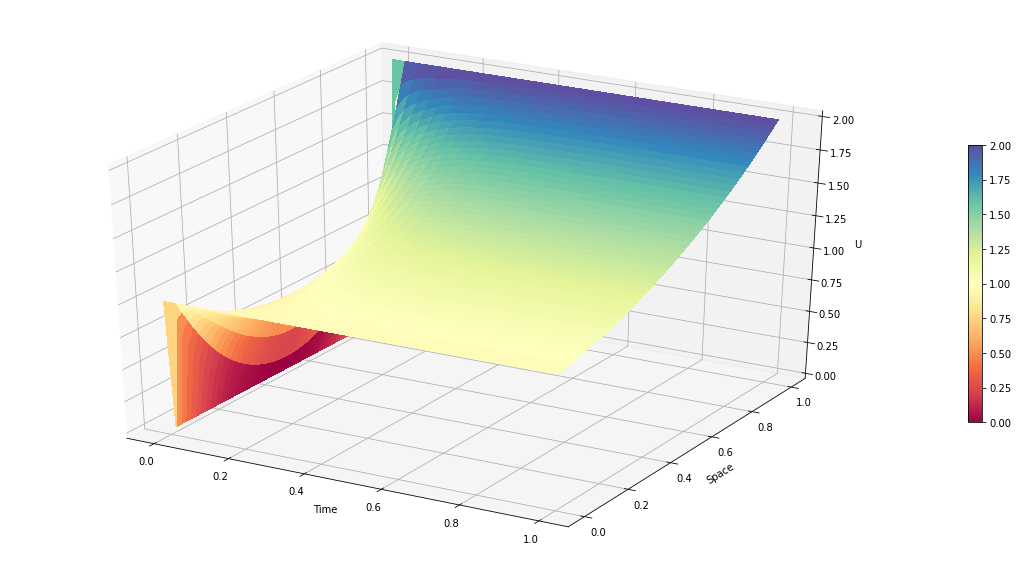

In [9]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

# Posiciones (inicial y final)
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# Tiempo (inicial y final)
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0 # Condición inicial u(x,0)=0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 # Condiciones en la frontera u(0,t)=1 
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

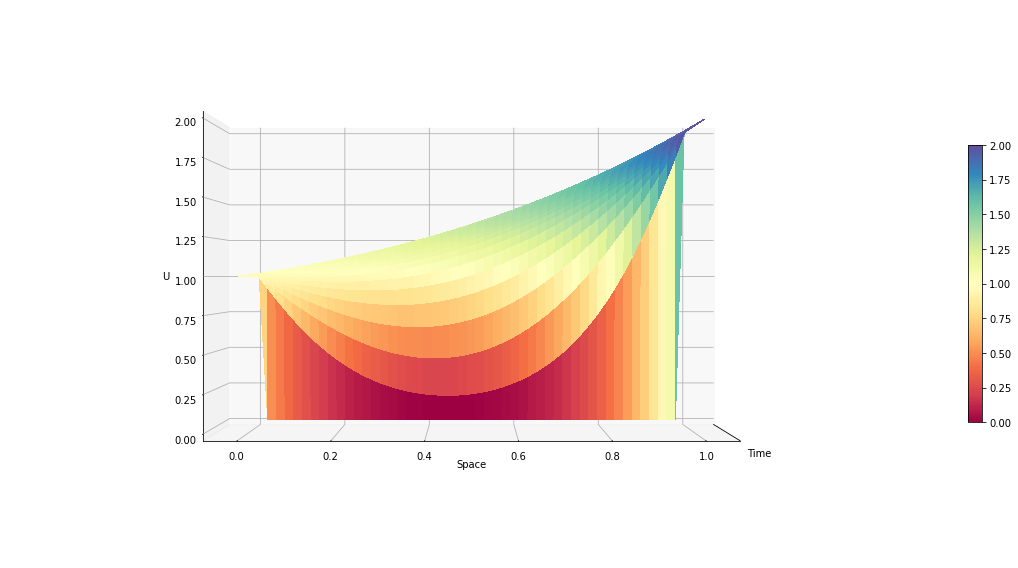

In [18]:
# Cambio de perpectiva para la gráfica

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

ax.set_xticks([])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()

Se puede observar que la concentración del compuesto químico inicia siendo cero cuando el tiempo es cero (vacío).  La concentración en el espacio 0 es de 1, siendo el extremo de una curva que crece muy rápido y al ser el espacio 1 la concentración llega a 2. Se puede notar que se estabiliza y conforme el espacio es mayor la concentración también crece.

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$  y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.


True


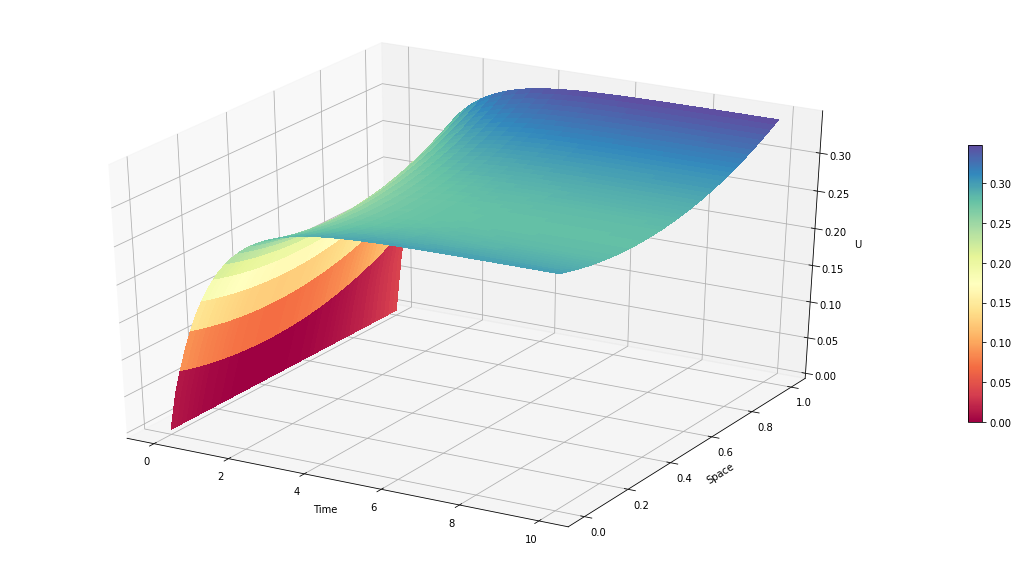

In [20]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0

#----- Neumann boundary conditions -----
tiempo = np.ones([N+1, 1])
f = 0.1*tiempo # Para (0,t)=0.1

g = 0.2*tiempo # Para (1,t)=0.2


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

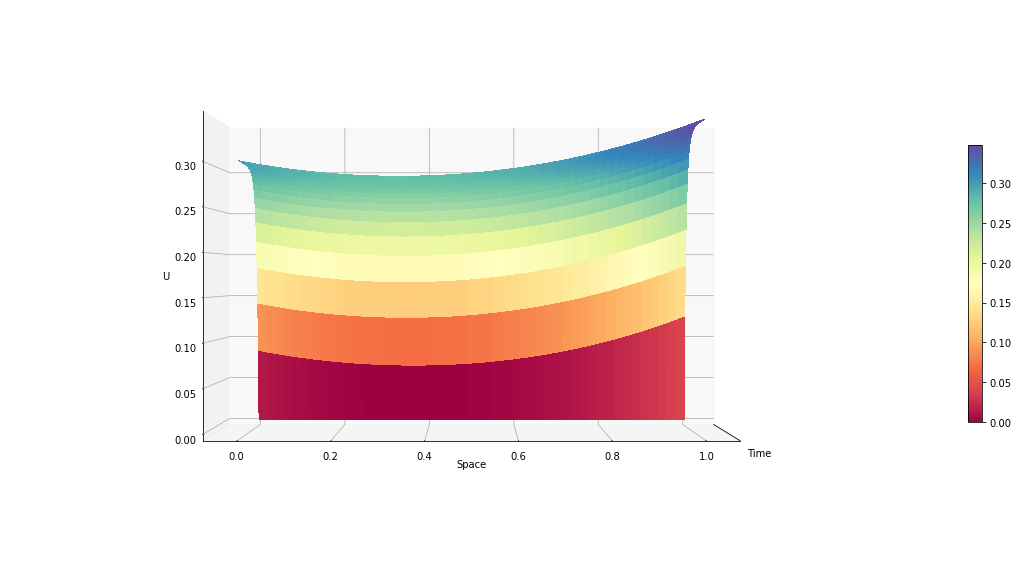

In [21]:
# Cambio de perpectiva para la gráfica

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

ax.set_xticks([])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()

Se puede observar que el tubo incia vacío como se menciona en el problema (concentración igual a cero). También se observa cierta estabilidad en una curva que va desde poco más de 0.30 hasta aproximadamente 0.35. Se observa que a mayor espacio mayor concentración, sin embargo para este problema las curvas son más planas y por lo tanto, la variación es menor.

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el  mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso. 

True


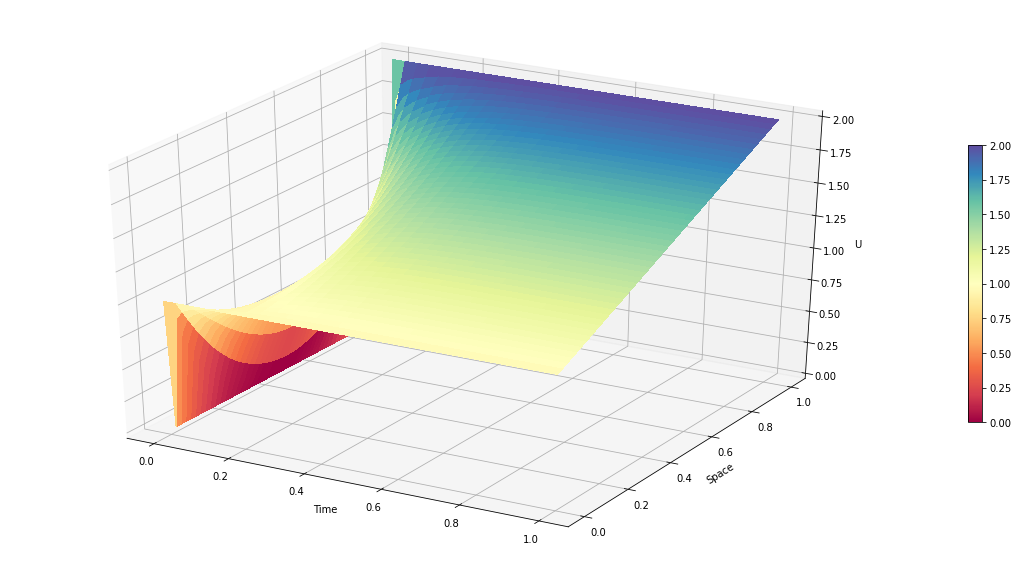

In [22]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0 # Para u(x,0)=0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 # Condiciones en la frontera u(0,t)=1
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

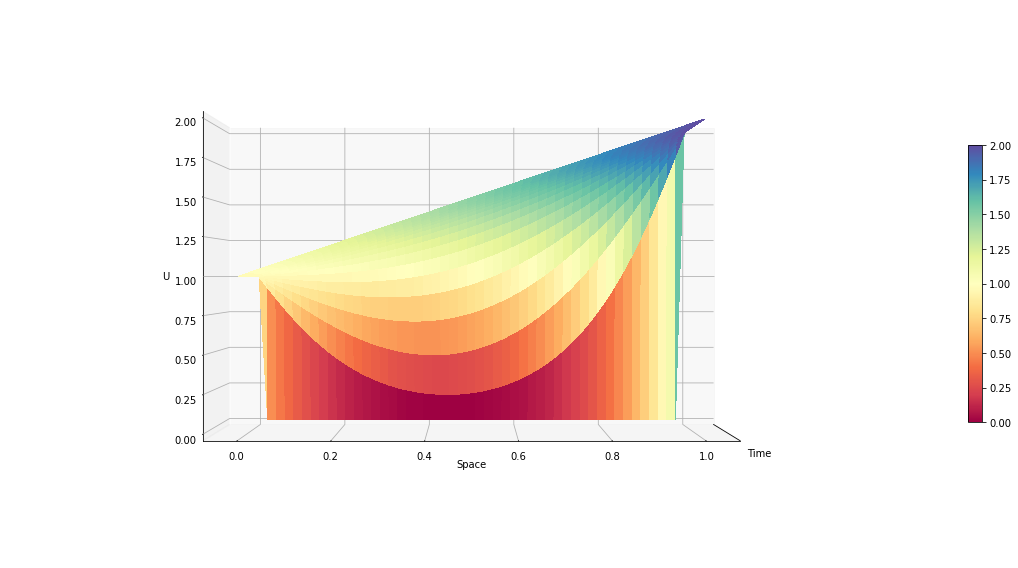

In [23]:
# Cambio de perpectiva para la gráfica

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.Spectral, antialiased=False)

ax.set_xticks([])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.Spectral)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()

Se puede observar que este problema es muy similar al problema 1, ya que las condiciones son las mismas, sin embargo, al cambiar el valor de $\alpha$ (para este caso $\alpha = 0$) la parábola que mostraba el problema 1 se convierte en una recta para el problema 3, siendo la concentración del compuesto químico mayor ligeramente en este último caso.  